In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)


In [2]:
sndata=pd.read_csv(r"C:\Users\R Sobha Supriya\Desktop\internship datsets&files\Social_Network_Ads.csv",header=0)
sndata_bk=sndata.copy()
sndata.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
sndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
sndata.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [5]:
sndata.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
sndata.duplicated().any()

False

In [7]:
sndata['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object>

In [8]:
#use label encoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
sndata["Gender"]=LE.fit_transform(sndata[["Gender"]])

In [9]:
sndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [10]:
del sndata['User ID']
sndata.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [11]:
cols1=['Age','EstimatedSalary']


In [12]:
#no cols can be declared  as IT USWED FOR ENTIRE Data
#Identify the independent and Target (dependent) variable
IndepVar = []
for col in sndata.columns:
    if col != 'Purchased':
        IndepVar.append(col)

TargetVar = 'Purchased'
x = sndata[IndepVar]
y = sndata[TargetVar]


In [13]:

# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape



((280, 3), (120, 3), (280,), (120,))

In [14]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
#x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
#x_test = mmscaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test)

Confusion matrix : 
 [[38  9]
 [ 2 71]]
Outcome values : 
 38 9 2 71
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.81      0.87        47
           0       0.89      0.97      0.93        73

    accuracy                           0.91       120
   macro avg       0.92      0.89      0.90       120
weighted avg       0.91      0.91      0.91       120

Accuracy : 90.8 %
Precision : 95.0 %
Recall : 80.9 %
F1 Score : 0.874
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 89.1 %
MCC : 0.809
roc_auc_score: 0.891


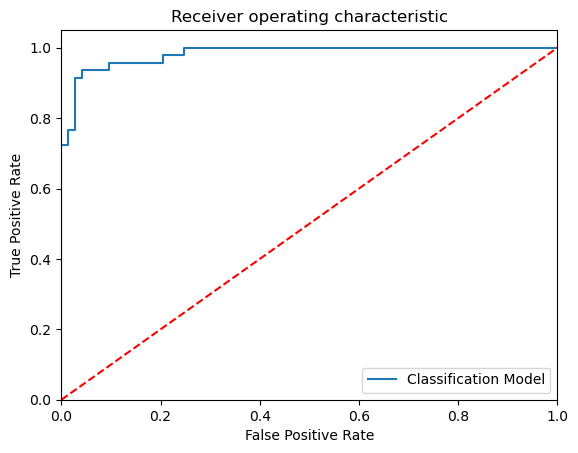

-----------------------------------------------------------------------------------------------------


In [15]:
#naive bayes model(gaussiannb)algorithm

# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelGNB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')



In [16]:
#display the final results 
Results = pd.DataFrame({'Purchased_A':y_test, 'Purchased_P_F':y_pred})
#Merge two Dataframes on index of both the dataframes
ResultsFinal = sndata_bk.merge(Results,left_index=True,right_index=True)
# Calculate the %of Error
#ResultsFinal['%Error'] = round(((ResultsFinal['CSinMPa_A']-ResultsFinal['CSinMPa_P'])/ResultsFinal['CSinMPa_A'])*100,3)
#display 10 records randomly
ResultsFinal.sample(10)


,User ID,Gender,Age,EstimatedSalary,Purchased,Purchased_A,Purchased_P_F
77,15774179,Female,22,27000,0,0,0
268,15746203,Female,47,144000,1,1,1
225,15622171,Male,37,53000,0,0,0
124,15678168,Female,41,51000,0,0,0
90,15684801,Male,22,81000,0,0,0
70,15756932,Male,25,80000,0,0,0
148,15779862,Male,29,61000,0,0,0
176,15609653,Female,35,47000,0,0,0
113,15773447,Male,37,55000,0,0,0
19,15621083,Female,48,29000,1,1,1


In [17]:
#compare classification algorithms
#load the results
EM_Results=pd.read_csv(r"C:\Users\R Sobha Supriya\Desktop\internship datsets&files\EMResults.csv",header=0)
#display first 5 records
EM_Results.head()


,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[29 18]
 [ 1 72]]
Outcome values : 
 29 18 1 72
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.62      0.75        47
           0       0.80      0.99      0.88        73

    accuracy                           0.84       120
   macro avg       0.88      0.80      0.82       120
weighted avg       0.87      0.84      0.83       120

Accuracy : 84.2 %
Precision : 96.7 %
Recall : 61.7 %
F1 Score : 0.753
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 80.2 %
MCC : 0.68
roc_auc_score: 0.802


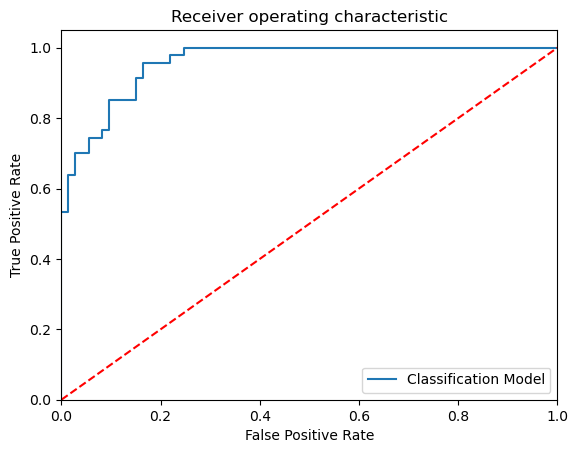

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[38  9]
 [ 8 65]]
Outcome values : 
 38 9 8 65
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.81      0.82        47
           0       0.88      0.89      0.88        73

    accuracy                           0.86       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120

Accuracy : 85.8 %
Precision : 82.6 %
Recall : 80.9 %
F1 Score : 0.817
Specificity or True Negative Rate : 89.0 %
Balanced Accuracy : 85.0 %
MCC : 0.702
roc_auc_score: 0.849


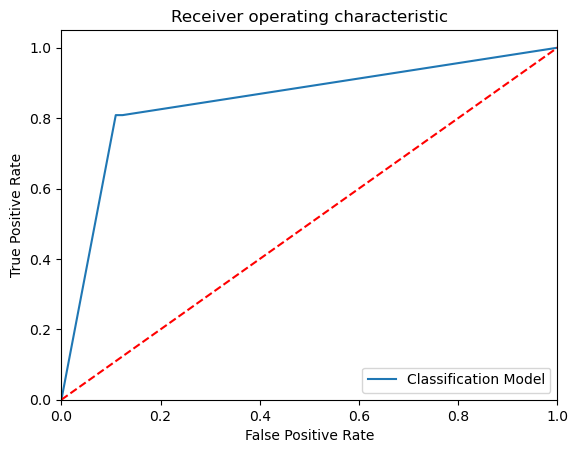

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[42  5]
 [ 6 67]]
Outcome values : 
 42 5 6 67
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.89      0.88        47
           0       0.93      0.92      0.92        73

    accuracy                           0.91       120
   macro avg       0.90      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120

Accuracy : 90.8 %
Precision : 87.5 %
Recall : 89.4 %
F1 Score : 0.884
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 90.6 %
MCC : 0.808
roc_auc_score: 0.906


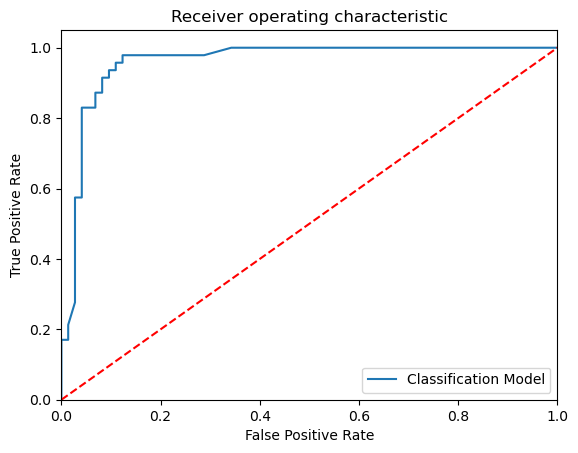

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[40  7]
 [ 5 68]]
Outcome values : 
 40 7 5 68
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.85      0.87        47
           0       0.91      0.93      0.92        73

    accuracy                           0.90       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120

Accuracy : 90.0 %
Precision : 88.9 %
Recall : 85.1 %
F1 Score : 0.87
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 89.2 %
MCC : 0.789
roc_auc_score: 0.891


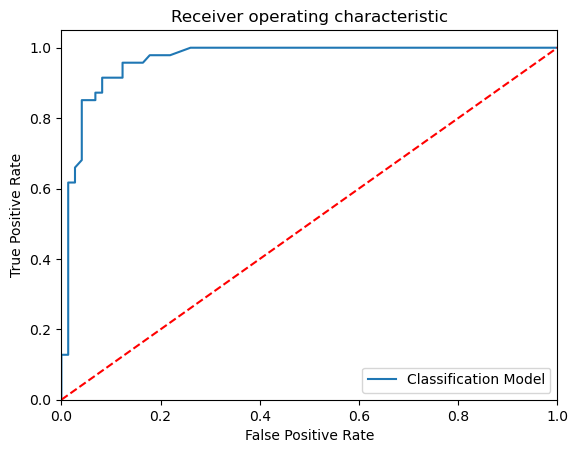

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[42  5]
 [ 5 68]]
Outcome values : 
 42 5 5 68
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.89      0.89        47
           0       0.93      0.93      0.93        73

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

Accuracy : 91.7 %
Precision : 89.4 %
Recall : 89.4 %
F1 Score : 0.894
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 91.3 %
MCC : 0.825
roc_auc_score: 0.913


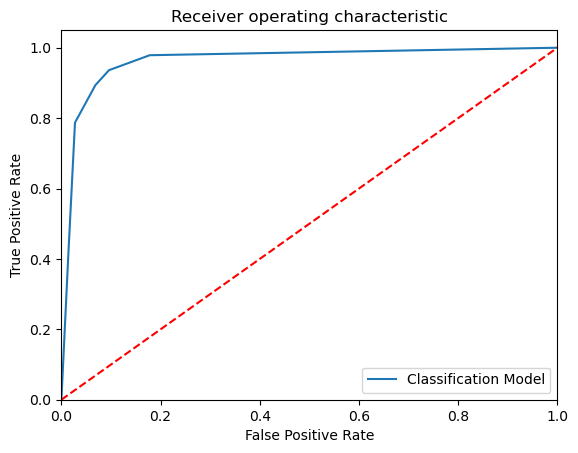

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[44  3]
 [ 6 67]]
Outcome values : 
 44 3 6 67
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.94      0.91        47
           0       0.96      0.92      0.94        73

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120

Accuracy : 92.5 %
Precision : 88.0 %
Recall : 93.6 %
F1 Score : 0.907
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 92.7 %
MCC : 0.846
roc_auc_score: 0.927


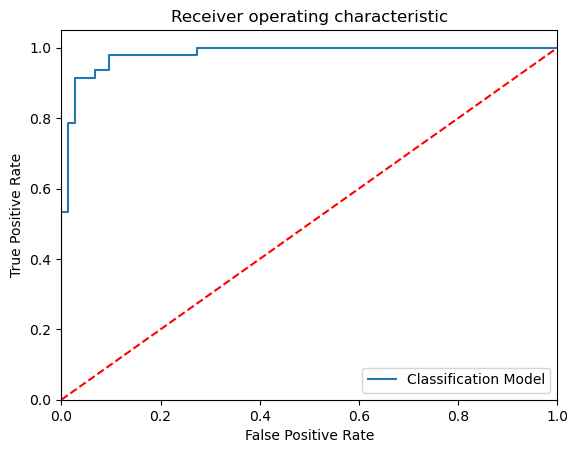

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[38  9]
 [ 2 71]]
Outcome values : 
 38 9 2 71
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.81      0.87        47
           0       0.89      0.97      0.93        73

    accuracy                           0.91       120
   macro avg       0.92      0.89      0.90       120
weighted avg       0.91      0.91      0.91       120

Accuracy : 90.8 %
Precision : 95.0 %
Recall : 80.9 %
F1 Score : 0.874
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 89.1 %
MCC : 0.809
roc_auc_score: 0.891


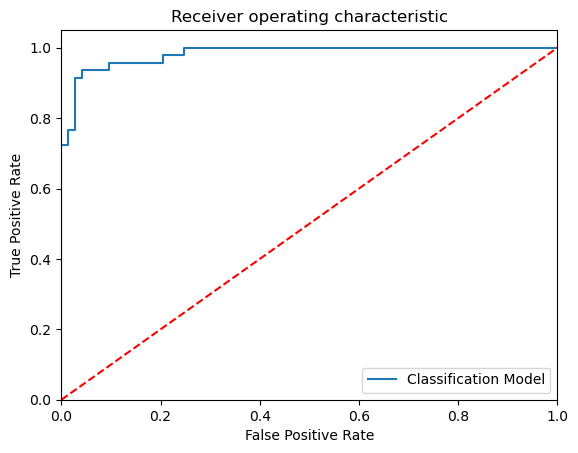

-----------------------------------------------------------------------------------------------------


In [18]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EM_Results = EM_Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------


In [19]:
EM_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),29,18,1,72,0.842,0.967,0.617,0.753,0.986,0.680,0.801661,0.802
1,DecisionTreeClassifier(),38,9,8,65,0.858,0.826,0.809,0.817,0.890,0.702,0.849461,0.850
2,"(DecisionTreeClassifier(max_features='sqrt', r...",42,5,6,67,0.908,0.875,0.894,0.884,0.918,0.808,0.905713,0.906
3,"(ExtraTreeClassifier(random_state=1459648006),...",40,7,5,68,0.900,0.889,0.851,0.870,0.932,0.789,0.891285,0.892
4,KNeighborsClassifier(),42,5,5,68,0.917,0.894,0.894,0.894,0.932,0.825,0.912562,0.913
5,"SVC(class_weight='balanced', probability=True,...",44,3,6,67,0.925,0.880,0.936,0.907,0.918,0.846,0.926989,0.927
6,GaussianNB(),38,9,2,71,0.908,0.950,0.809,0.874,0.973,0.809,0.890557,0.891


In [20]:
y_predRF=ModelRF.predict(x_test)

In [21]:
#display the final results 
Results = pd.DataFrame({'Purchased_A':y_test, 'Purchased_P_F':y_pred})
#Merge two Dataframes on index of both the dataframes
ResultsFinal = sndata_bk.merge(Results,left_index=True,right_index=True)
# Calculate the %of Error
#ResultsFinal['%Error'] = round(((ResultsFinal['CSinMPa_A']-ResultsFinal['CSinMPa_P'])/ResultsFinal['CSinMPa_A'])*100,3)
#display 10 records randomly
ResultsFinal.sample(10)


,User ID,Gender,Age,EstimatedSalary,Purchased,Purchased_A,Purchased_P_F
349,15721835,Male,38,61000,0,0,0
376,15596984,Female,46,74000,0,0,1
176,15609653,Female,35,47000,0,0,0
396,15706071,Male,51,23000,1,1,1
297,15705298,Female,43,112000,1,1,1
391,15592570,Male,47,23000,1,1,1
374,15793890,Female,37,80000,0,0,0
75,15651983,Male,34,112000,1,1,0
281,15685536,Male,35,61000,0,0,0
22,15714658,Male,48,41000,1,1,1
